In [1]:
import numpy as np
import matplotlib.pyplot as plt
from COSMOS_Astrometry import astrometry_tools as at
import csv

Catalogs of star positions for three surveys: HSC, HST, GAIA

In [2]:
# Load catalogs
# HSC
# The original catalog is too big to be stored on the git repo. Download the catalog or use my reduced catalog:
# hsc_cat = np.loadtxt('./COSMOS_s18a_dud_forced_starcatalog.csv', delimiter = ',', dtype = str) #Original full catalog
# Replace filename by 'COSMOS_s16a_udeep_forced_starcatalog.csv' for pretty plots of HSC 2016 release.
hsc_cat = np.loadtxt('../Data/Catalog_HSC.csv', dtype = str)#reduced catalog with astrometry only
# HST
#hst_cat = np.loadtxt('./astrometry_acs_iphot_sep07_9441.txt', dtype = str) #Same as for HSC, file too big
hst_cat = np.loadtxt('../Data/Catalog_HST.csv', dtype = str)
# Reference gaia catalog
gaia_cat = np.loadtxt('../Data/Gaia_data_cosmos_dr2.csv', delimiter = ',', dtype = str)


# Positions from these catalogs in ra-dec
ra_pos = np.where(hst_cat[0,:]=='ra|')
dec_pos = np.where(hst_cat[0,:]=='dec|')

ra_hsc = hsc_cat[:,0].astype(float)
dec_hsc = hsc_cat[:,1].astype(float)

ra_hst = hst_cat[:,0].astype(float)
dec_hst = hst_cat[:,1].astype(float)

ra_gaia = gaia_cat[1:,1].astype(float)
dec_gaia = gaia_cat[1:,3].astype(float)

# Make coordinates arrays
coord_hst = np.array([ra_hst, dec_hst]).T
coord_gaia = np.array([ra_gaia, dec_gaia]).T
coord_hsc = np.array([ra_hsc, dec_hsc]).T

/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


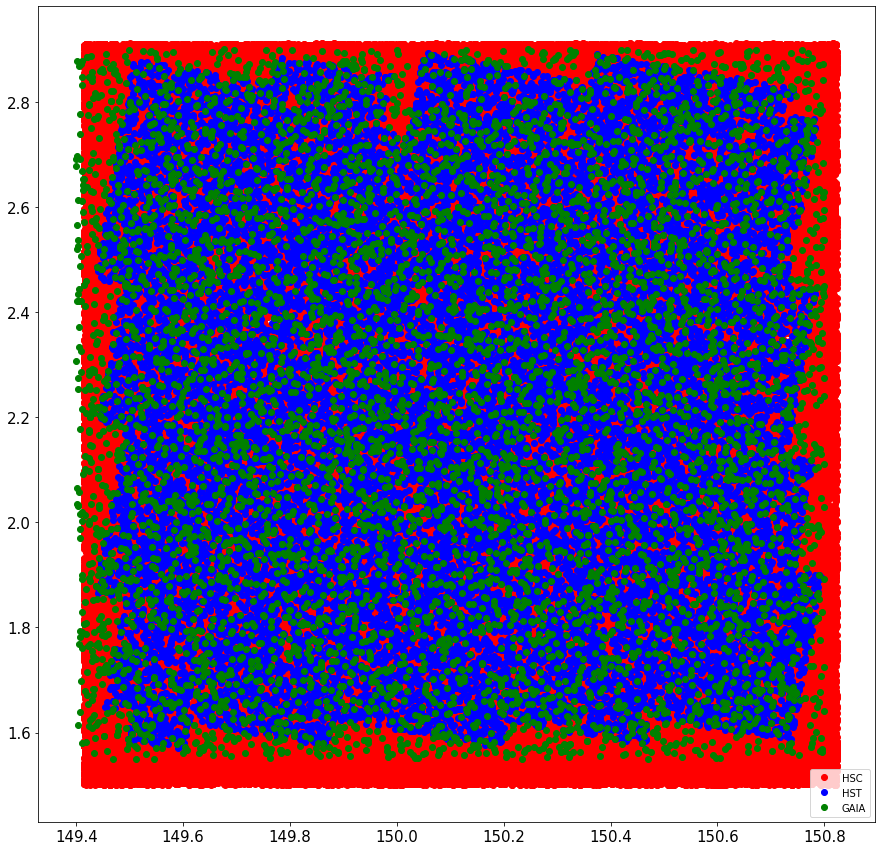

In [3]:
# Positions of stars in each survey
plt.figure(figsize = (15,15))
plt.plot(ra_hsc, dec_hsc, 'or', label = 'HSC')
plt.plot(ra_hst, dec_hst, 'ob', label = 'HST')
plt.plot(ra_gaia, dec_gaia, 'og', label = 'GAIA')
plt.legend()
plt.show()

In [4]:
# We are going to look for stars which positions correspond to one another between survey. 
# This is the search radius to attribute corresponding stars.
radius = 1./3600.*0.5 #Search radius

Extracts the difference in position between a star and a corresponding star in another survey. Position difference are computed in cartesian and polar coordiantes. 

In [5]:
# Compute distances
print('HST vs HSC')
modulus_tc, angle_tc, v_coord_tc, garbage_tc, xerr_tc, yerr_tc = at.get_distances(coord_hst, coord_hsc, radius)
print('HST vs gaia')
modulus_tg, angle_tg, v_coord_tg, garbage_tg, xerr_tg, yerr_tg = at.get_distances(coord_gaia, coord_hst, radius)
print('HSC vs gaia')
modulus_cg, angle_cg, v_coord_cg, garbage_cg, xerr_cg, yerr_cg = at.get_distances(coord_gaia, coord_hsc, radius)

# And tabulate them
tab_HST = np.concatenate((v_coord_tg[:,np.newaxis,0], v_coord_tg[:,np.newaxis,1], modulus_tg[:,np.newaxis], 
                          angle_tg[:,np.newaxis],  xerr_tg[:,np.newaxis], yerr_tg[:,np.newaxis]), axis = 1)
tab_HSC = np.concatenate((v_coord_cg[:,np.newaxis,0], v_coord_cg[:,np.newaxis,1],modulus_cg[:,np.newaxis], 
                          angle_cg[:,np.newaxis],  xerr_cg[:,np.newaxis], yerr_cg[:,np.newaxis]), axis = 1)

print('median displacement: {}, and mean angle:{} '.format(np.median(modulus_tg), np.mean(angle_tg)))

HST vs HSC
number of points in reference catalog: 28109
point number 0 out of 28109
point number 3000 out of 28109
point number 6000 out of 28109
point number 9000 out of 28109
point number 12000 out of 28109
point number 15000 out of 28109
point number 18000 out of 28109
point number 21000 out of 28109
point number 24000 out of 28109
point number 27000 out of 28109
HST vs gaia
number of points in reference catalog: 6775
point number 0 out of 6775
point number 3000 out of 6775
point number 6000 out of 6775
HSC vs gaia
number of points in reference catalog: 6775
point number 0 out of 6775
point number 3000 out of 6775
point number 6000 out of 6775
median displacement: 4.4750118475607095e-05, and mean angle:0.4136047623181346 


Plots of the distribution of astrometric errors.

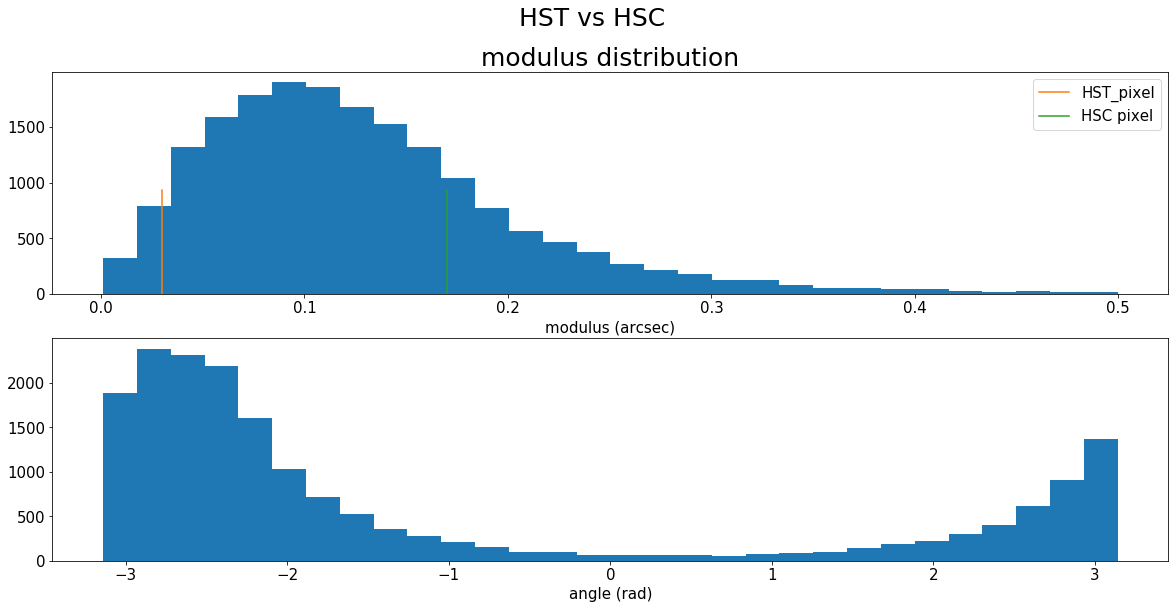

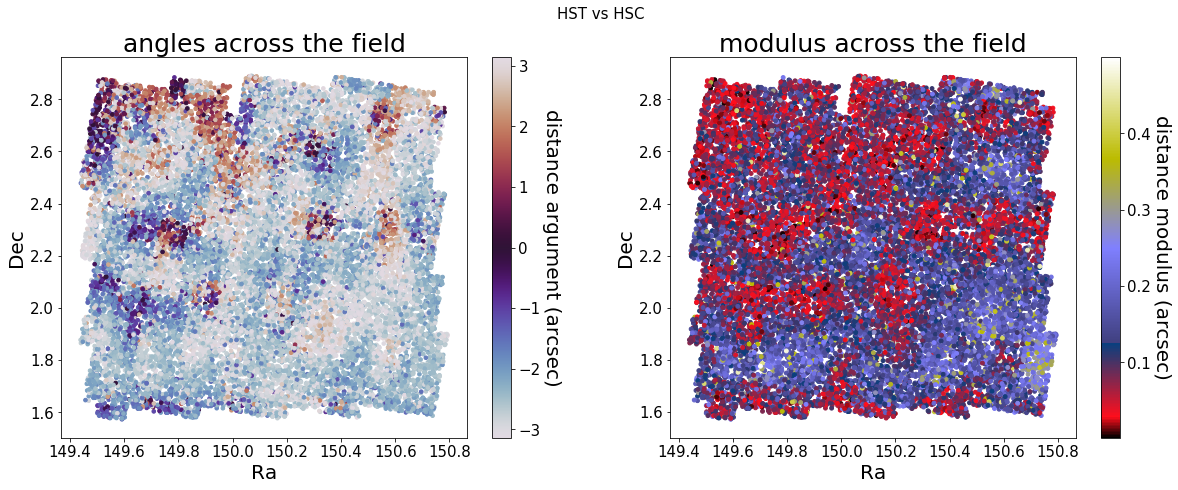

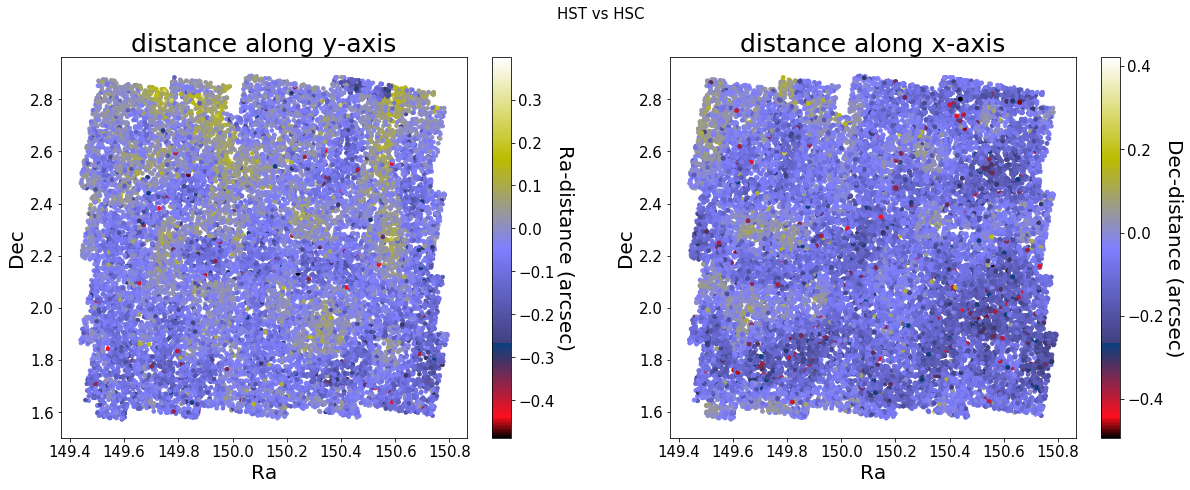

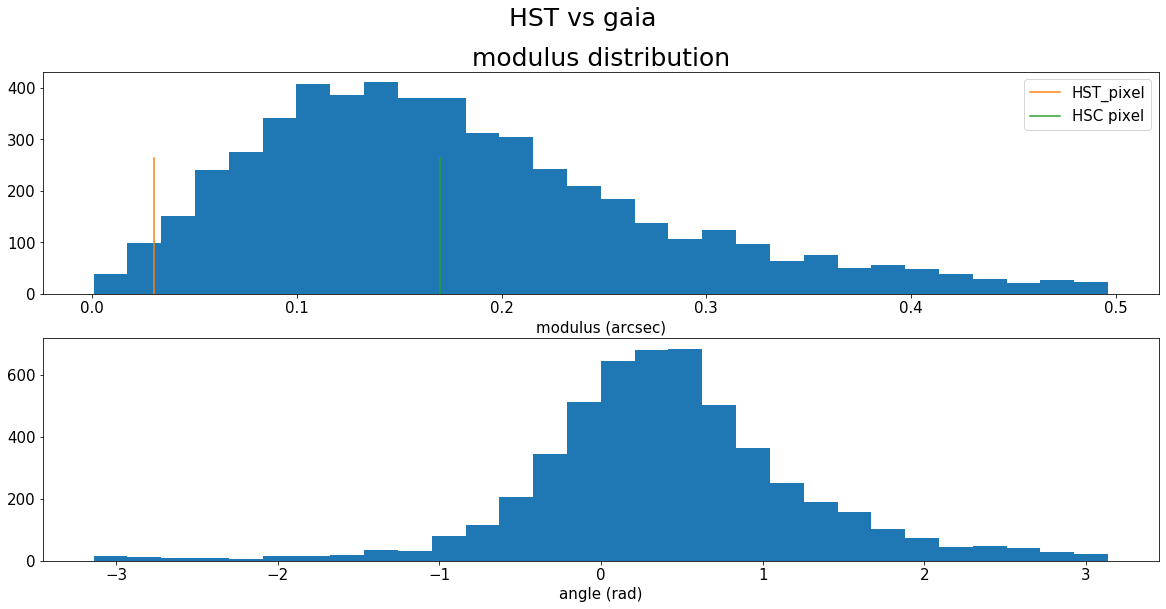

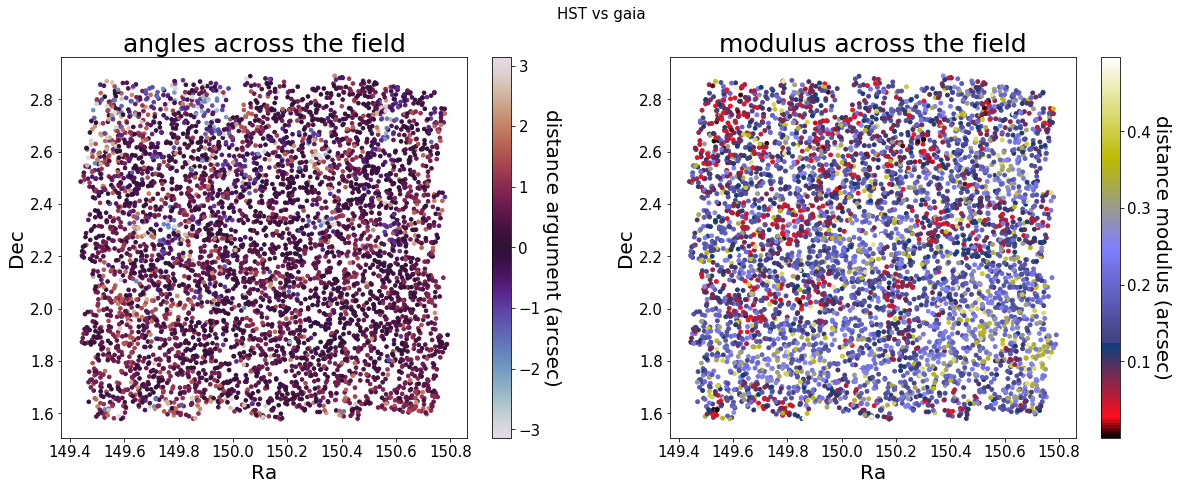

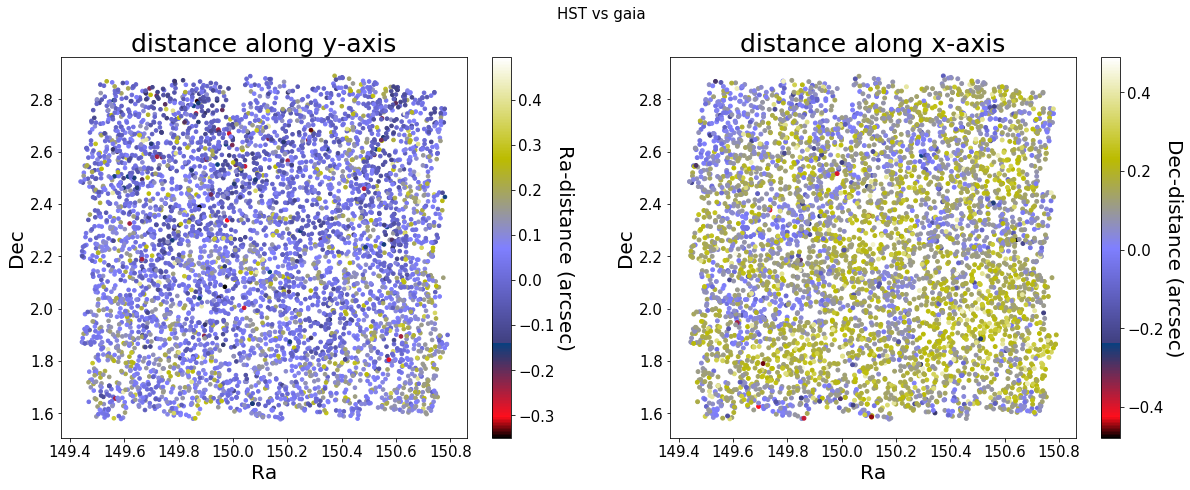

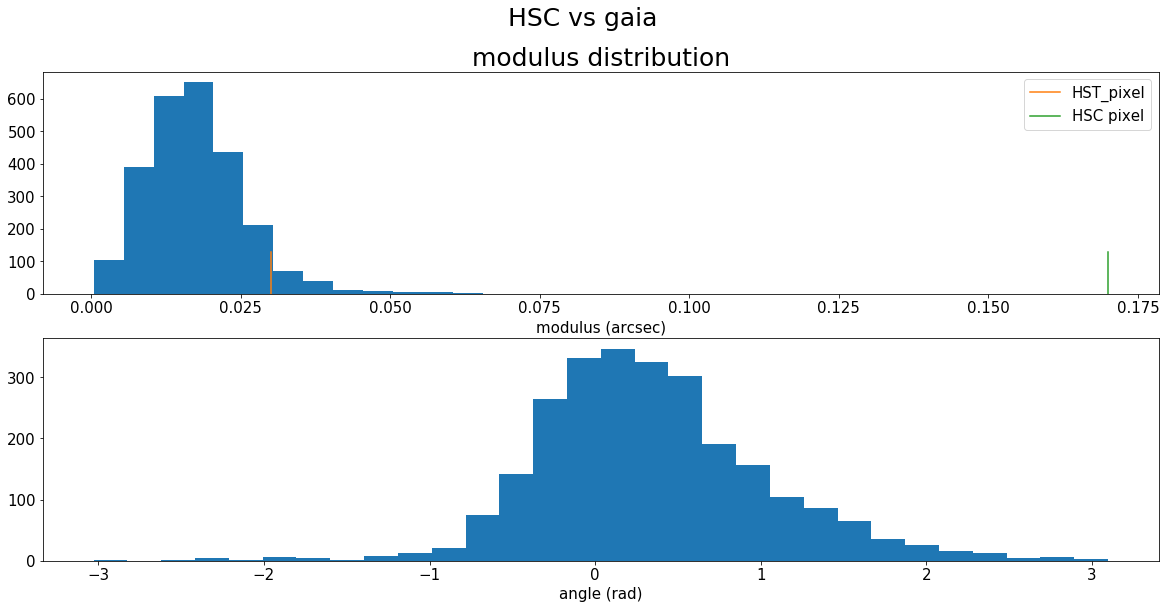

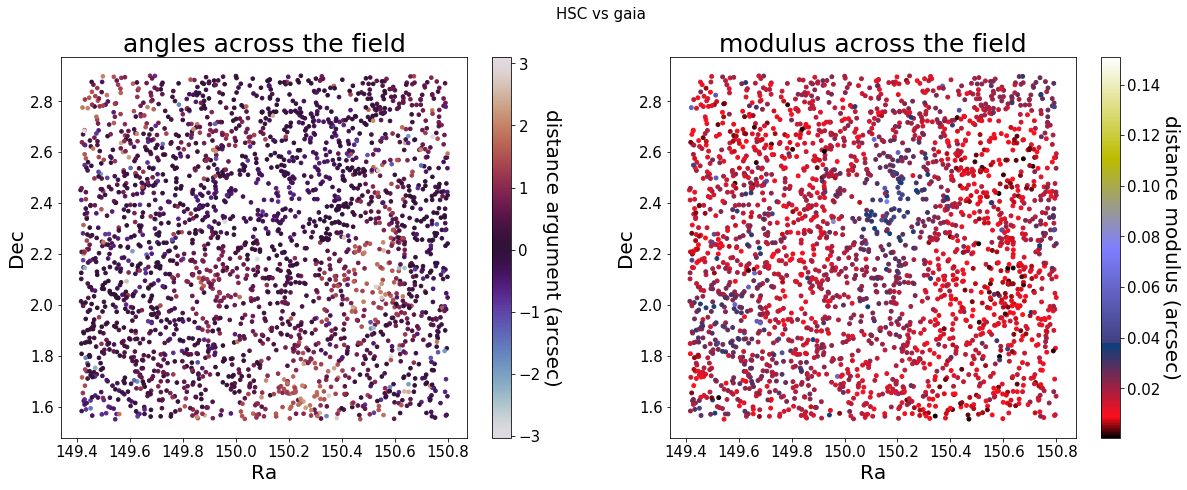

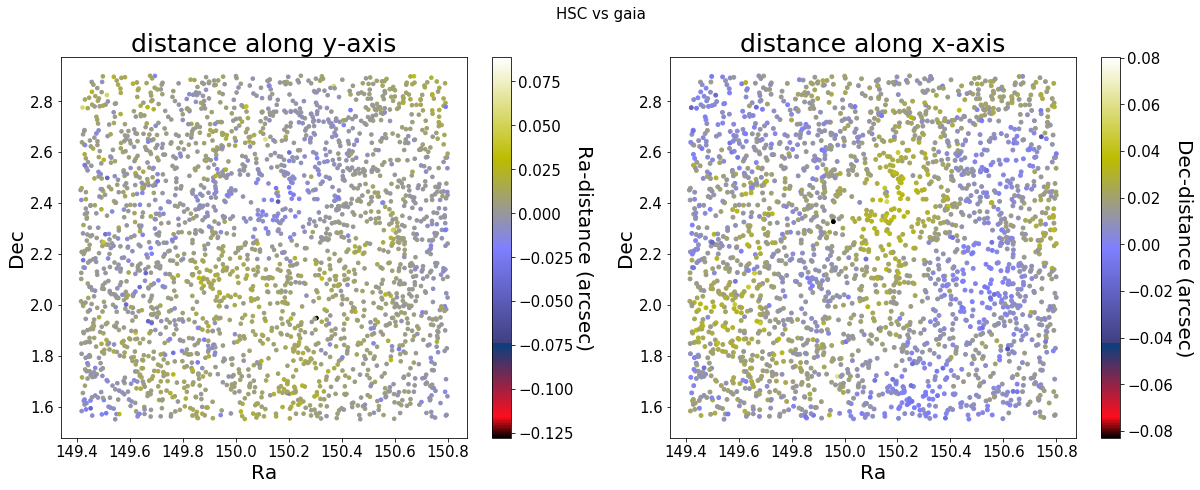

median moduls HST 0.16110042651218553
median moduls HSC 0.01657940881272934


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be

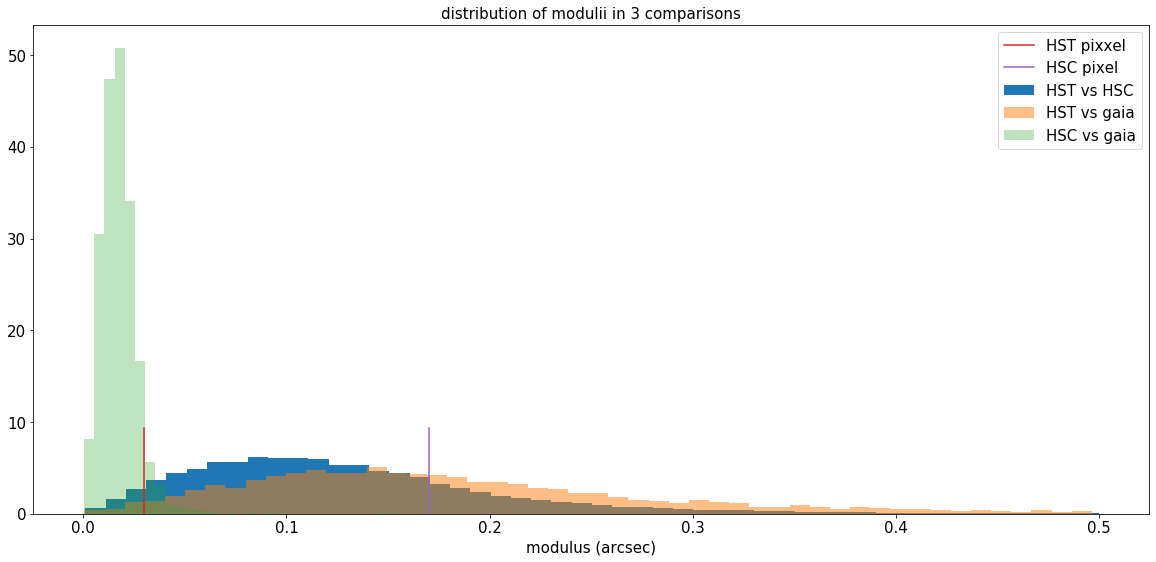

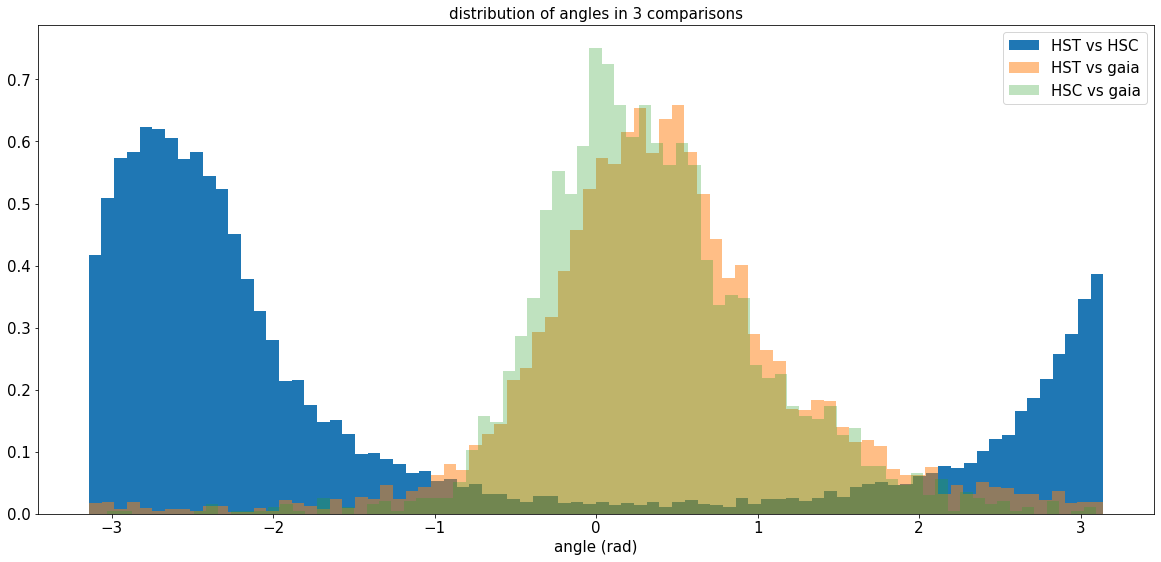

In [10]:
# Plots
at.plot_results(modulus_tc, angle_tc, xerr_tc, yerr_tc, v_coord_tc, pixel = [0.03, 0.17], label = ['HST_pixel', 'HSC pixel'], legend = 'HST vs HSC', init = 1, fontsize = 15)
at.plot_results(modulus_tg, angle_tg, xerr_tg, yerr_tg, v_coord_tg, pixel = [0.03, 0.17], label = ['HST_pixel', 'HSC pixel'], legend = 'HST vs gaia', init = 4, fontsize = 15)
at.plot_results(modulus_cg, angle_cg, xerr_cg, yerr_cg, v_coord_cg, pixel = [0.03, 0.17], label = ['HST_pixel', 'HSC pixel'], legend = 'HSC vs gaia', init = 7, fontsize = 15)
at.plt.show()

print('median moduls HST',np.median(modulus_tg*3600))
print('median moduls HSC',np.median(modulus_cg*3600))

plt.figure(0, figsize=(20,9))
plt.title('distribution of modulii in 3 comparisons', fontsize = 15)
plt.hist(modulus_tc*3600., bins = 50, label = 'HST vs HSC', normed = True, alpha = 1)
plt.hist(modulus_tg*3600., bins = 50, label = 'HST vs gaia', normed = True, alpha = 0.5)
plt.hist(modulus_cg*3600., bins = 30, label = 'HSC vs gaia', normed = True, alpha = 0.3)
plt.plot([0.03, 0.03], [0, modulus_tc.size/2000.], label='HST pixxel')
plt.plot([0.17, 0.17], [0, modulus_tc.size/2000.], label='HSC pixel')
plt.xlabel('modulus (arcsec)', fontsize = 15)
plt.legend(fontsize = 15)

plt.figure(1, figsize=(20,9))
plt.title('distribution of angles in 3 comparisons', fontsize = 15)
plt.hist(angle_tc, bins = 80, label = 'HST vs HSC', normed = True, alpha = 1)
plt.hist(angle_tg, bins = 80, label = 'HST vs gaia', normed = True, alpha = 0.5)
plt.hist(angle_cg, bins = 80, label = 'HSC vs gaia', normed = True, alpha = 0.3)
plt.xlabel('angle (rad)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [7]:
#Write catallogs
with open('../Results/HST_astrometric_errors.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([["Ra (deg)", "Dec (deg)", "Modulus (deg)", "angle (rad)", "x_err (deg)", "y_err (deg)"]])
    writer.writerows(tab_HST)
with open('../Results/HSC_astrometric_errors.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows([["Ra (deg)", "Dec (deg)", "Modulus (deg)", "angle (rad)", "x_err (deg)", "y_err (deg)"]])
    writer.writerows(tab_HSC)